# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [125]:
A1, b1 = main.random_matrix_Ab(10)
A2, b2 = main.diag_dominant_matrix_A_b(10)
A3, b3 = main.symmetric_matrix_A_b(10)
print(main.is_diag_dominant(A2))

True


***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Norma residuum dla funkcji solve: 
7.426786282979547e-14 

macierz nie spełnia warunków metody jacobiego
macierz nie spełnia warunków metody gradientów sprzężonych
563 µs ± 133 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
510 µs ± 122 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
507 µs ± 94.4 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
The slowest run took 11.50 times longer than the fastest. This could mean that an intermediate result is being cached.
528 µs ± 393 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
494 µs ± 123 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
The slowest run took 4.48 times longer than the fastest. This could mean that an intermediate result is being cached.
511 µs ± 157 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
515 µs ± 105 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
531 µs ± 121 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
579 µs ± 170 µs per loop (mean

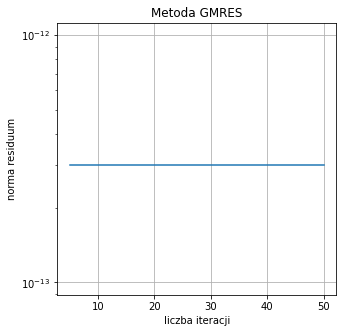

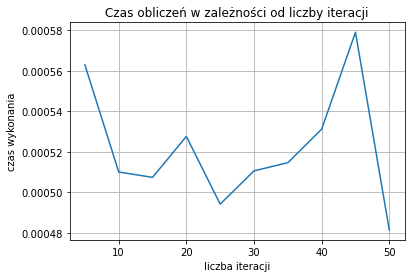

In [158]:
solve0 = np_linalg.solve(A1, b1) - np.ones(10)
norm1 = []
norm2 = []
norm3 = []
time = []

# funkcja solve - brak warunków
solve01 = np_linalg.solve(A1, b1)
print('Norma residuum dla funkcji solve: ')
print(np_linalg.norm(b1 - A1 @ solve01), '\n')

# metoda jacobiego - macierz ma być diagonalnie zdominowana
if main.is_diag_dominant(A1):
    for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        solve1 = main.solve_jacobi(A1, b1, solve0, maxiter=n)[0]
        norm1.append(np_linalg.norm(b1 - A1 @ solve1))
else:
    print('macierz nie spełnia warunków metody jacobiego')


# metoda gradientów sprzężonych - macierz ma być symetryczna i dodatnio określona
if main.is_symmetric(A1) and np.all(np.linalg.eigvals(A1) > 0):
    for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        solve11 = sp.sparse.linalg.cg(A1, b1, x0=solve0, maxiter=n)[0]
        norm2.append(np.linalg.norm(b1 - A1 @ solve11))
else:
    print('macierz nie spełnia warunków metody gradientów sprzężonych')
        

# metoda GMRES - brak warunków
for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    solve111 = sp.sparse.linalg.gmres(A1, b1, x0=solve0, maxiter=n)[0]
    norm3.append(np.linalg.norm(b1 - A1 @ solve111))
    avg_time = %timeit -r 100 -n 10 -o sp.sparse.linalg.gmres(A1, b1, maxiter=n)
    time.append(avg_time.average)
    
i = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
fig, (ax3) = plt.subplots(1, 1, figsize=(5, 5))
ax3.semilogy(i, norm3)
ax3.set_title('Metoda GMRES')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('norma residuum')
plt.grid()
plt.show()

plt.plot(i, time)
plt.title('Czas obliczeń w zależności od liczby iteracji')
plt.xlabel('liczba iteracji')
plt.ylabel('czas wykonania')
plt.grid()
plt.show()


***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Norma residuum dla funkcji solve: 
5.102196573270515e-15 

115 µs ± 19.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
186 µs ± 20.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
242 µs ± 40.2 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
363 µs ± 54.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
461 µs ± 95.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
608 µs ± 66.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
634 µs ± 95 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
624 µs ± 72.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
773 µs ± 47.8 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
827 µs ± 84.7 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
macierz nie spełnia warunków metody gradientów sprzężonych
523 µs ± 105 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
463 µs ± 97.3 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
487 µs ± 95.7 µs per 

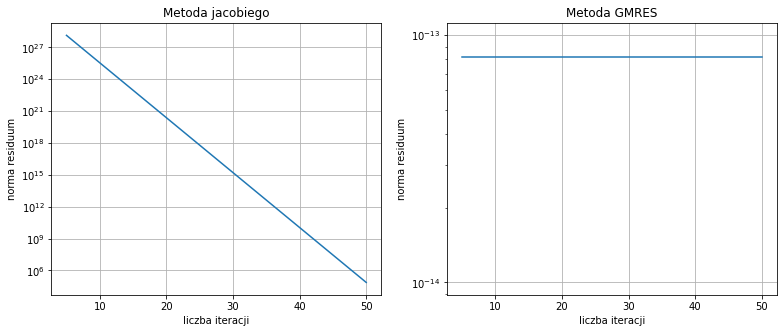

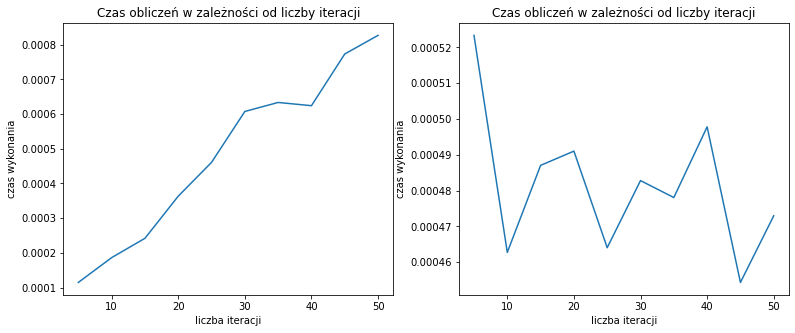

In [161]:
solve0 = np_linalg.solve(A2, b2) - np.ones(10)
norm1 = []
norm2 = []
norm3 = []
time = []
time1 = []

# funkcja solve
solve01 = np_linalg.solve(A2, b2)
print('Norma residuum dla funkcji solve: ')
print(np_linalg.norm(b2 - A2 @ solve01), '\n')

# metoda jacobiego
if main.is_diag_dominant(A2):
    for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        solve1 = main.solve_jacobi(A2, b2, solve0, maxiter=n)[0]
        norm1.append(np_linalg.norm(b2 - A2 @ solve1))
        avg_time = %timeit -r 10 -n 100 -o main.solve_jacobi(A2, b2, solve0, maxiter=n)
        time.append(avg_time.average)
else:
    print('macierz nie spełnia warunków metody jacobiego')

# metoda gradientów sprzężonych
if main.is_symmetric(A2) and np.all(np.linalg.eigvals(A2) > 0):
    for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        solve11 = sp.sparse.linalg.cg(A2, b2, x0=solve0, maxiter=n)[0]
        norm2.append(np.linalg.norm(b2 - A2 @ solve11))
else:
    print('macierz nie spełnia warunków metody gradientów sprzężonych')
        

# metoda GMRES
for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    solve111 = sp.sparse.linalg.gmres(A2, b2, x0=solve0, maxiter=n)[0]
    norm3.append(np.linalg.norm(b2 - A2 @ solve111))
    avg_time = %timeit -r 100 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=n)
    time1.append(avg_time.average)
    

i = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(13, 5))
ax2.semilogy(i, np.flip(norm1))
ax2.set_title('Metoda jacobiego')
ax2.set_xlabel('liczba iteracji')
ax2.set_ylabel('norma residuum')
ax3.semilogy(i, norm3)
ax3.set_title('Metoda GMRES')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('norma residuum')
ax2.grid()
ax3.grid()
plt.show()

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(13, 5))
ax2.plot(i, time)
ax2.set_title('Czas obliczeń w zależności od liczby iteracji')
ax2.set_xlabel('liczba iteracji')
ax2.set_ylabel('czas wykonania')
ax3.plot(i, time1)
ax3.set_title('Czas obliczeń w zależności od liczby iteracji')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('czas wykonania')
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Norma residuum dla funkcji solve: 
2.2385796613961446e-14 

macierz nie spełnia warunków metody jacobiego
macierz nie spełnia warunków metody gradientów sprzężonych
494 µs ± 107 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
527 µs ± 122 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
593 µs ± 176 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
512 µs ± 125 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
568 µs ± 149 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
542 µs ± 120 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
488 µs ± 94.5 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
501 µs ± 104 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
550 µs ± 88.7 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
461 µs ± 82.5 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


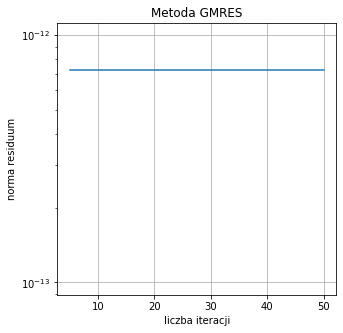

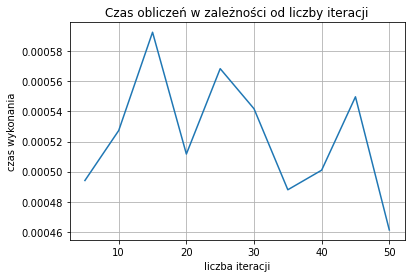

In [163]:
solve0 = np_linalg.solve(A3, b3) - np.ones(10)
norm1 = []
norm2 = []
norm3 = []
time = []

# funkcja solve
solve01 = np_linalg.solve(A3, b3)
print('Norma residuum dla funkcji solve: ')
print(np_linalg.norm(b3 - A3 @ solve01), '\n')

# metoda jacobiego
if main.is_diag_dominant(A3):
    for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        solve1 = main.solve_jacobi(A3, b3, solve0, maxiter=n)[0]
        norm1.append(np_linalg.norm(b3 - A3 @ solve1))
else:
    print('macierz nie spełnia warunków metody jacobiego')

# metoda gradientów sprzężonych
if main.is_symmetric(A3) and np.all(np.linalg.eigvals(A3) > 0):
    for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
        solve11 = sp.sparse.linalg.cg(A3, b3, x0=solve0, maxiter=n)[0]
        norm2.append(np.linalg.norm(b3 - A3 @ solve11))
else:
    print('macierz nie spełnia warunków metody gradientów sprzężonych')
        

# metoda GMRES
for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    solve111 = sp.sparse.linalg.gmres(A3, b3, x0=solve0, maxiter=n)[0]
    norm3.append(np.linalg.norm(b3 - A3 @ solve111))
    avg_time = %timeit -r 100 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=n)
    time.append(avg_time.average)
    

i = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
fig, (ax3) = plt.subplots(1, 1, figsize=(5, 5))
ax3.semilogy(i, norm3)
ax3.set_title('Metoda GMRES')
ax3.set_xlabel('liczba iteracji')
ax3.set_ylabel('norma residuum')
plt.grid()
plt.show()

plt.plot(i, time)
plt.title('Czas obliczeń w zależności od liczby iteracji')
plt.xlabel('liczba iteracji')
plt.ylabel('czas wykonania')
plt.grid()
plt.show()


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

Zapoznałem się z iteracyjnymi metodami rozwiązaywania układów równań liniowych w postaci macierzowej. Poznałem warunki, które musi spełniać macierz, aby możliwe było rozwiązanie układów równań według poszczególnych metod. Porównałem dokładność i czas potrzebny do znalezienia przybliżenia dokładengo rozwiązania.